<a href="https://colab.research.google.com/github/Nymisha-ruby/Experiments/blob/main/IPL_eda_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd 

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
balls = pd.read_excel('/content/drive/MyDrive/Book1.xlsx')
matches = pd.read_excel('/content/drive/MyDrive/Book2.xlsx')

In [4]:
# 10 random rows from the dataset
balls.sample(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
100243,733979,1,15,4,SV Samson,SR Watson,R Vinay Kumar,1,0,1,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
158888,1136596,2,16,5,KS Williamson,MK Pandey,TA Boult,0,0,0,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Delhi Daredevils
87059,598042,1,2,1,SS Tiwary,CH Gayle,TL Suman,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Pune Warriors
29898,419117,2,14,7,IK Pathan,PP Chawla,WPUJC Vaas,1,0,1,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Deccan Chargers
70659,548358,1,1,6,MJ Clarke,SC Ganguly,SW Tait,0,0,0,0,0,NaN,NaN,NaN,NaN,Pune Warriors,Rajasthan Royals
135757,981013,2,6,4,STR Binny,AB de Villiers,RA Jadeja,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Gujarat Lions
18516,392204,1,13,1,MV Boucher,V Kohli,Yuvraj Singh,0,0,0,0,1,lbw,MV Boucher,NaN,NaN,Royal Challengers Bangalore,Kings XI Punjab
35655,419141,1,18,7,SK Trivedi,M Morkel,RJ Harris,4,0,4,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Deccan Chargers
108273,734045,2,16,4,DJ Hussey,SK Raina,JJ Bumrah,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
10300,336026,1,17,4,Misbah-ul-Haq,B Akhil,MF Maharoof,0,0,0,0,1,run out,B Akhil,"V Sehwag,MF Maharoof",NaN,Royal Challengers Bangalore,Delhi Daredevils


In [4]:
matches.sample(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
393,598069,Hyderabad,2013-05-19,PA Patel,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,bat,Sunrisers Hyderabad,wickets,5.0,N,NaN,Asad Rauf,S Asnani
385,598061,Ranchi,2013-05-15,MK Pandey,JSCA International Stadium Complex,0,Kolkata Knight Riders,Pune Warriors,Kolkata Knight Riders,field,Pune Warriors,runs,7.0,N,NaN,NJ Llong,K Srinath
749,1178429,Bengaluru,2019-05-04,SO Hetmyer,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,N,NaN,NJ Llong,AK Chaudhary
337,598013,Kolkata,2013-04-14,G Gambhir,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,48.0,N,NaN,M Erasmus,VA Kulkarni
229,501253,Chennai,2011-05-12,MS Dhoni,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,runs,18.0,N,NaN,AM Saheba,SL Shastri
383,598059,Delhi,2013-04-23,Harmeet Singh,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,5.0,N,NaN,VA Kulkarni,K Srinath
165,419156,Dharamsala,2010-04-16,RG Sharma,Himachal Pradesh Cricket Association Stadium,0,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,5.0,N,NaN,M Erasmus,AM Saheba
565,980997,Visakhapatnam,2016-05-17,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,0,Rising Pune Supergiants,Delhi Daredevils,Rising Pune Supergiants,field,Rising Pune Supergiants,runs,19.0,N,D/L,Nitin Menon,C Shamshuddin
201,501225,Jaipur,2011-04-24,SK Warne,Sawai Mansingh Stadium,0,Rajasthan Royals,Kochi Tuskers Kerala,Rajasthan Royals,field,Rajasthan Royals,wickets,8.0,N,NaN,BR Doctrove,SK Tarapore
235,501259,Mumbai,2011-05-16,A Mishra,Dr DY Patil Sports Academy,0,Pune Warriors,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,6.0,N,NaN,S Ravi,SK Tarapore


In [4]:
print('Min date')
print(matches['date'].min())

print('\n')

print('Max date')
print(matches['date'].max())

Min date
2008-04-18 00:00:00


Max date
2020-11-10 00:00:00


In [5]:
# Checking no of rows and columns
print('No of data rows and columns:')
print(balls.shape)

print('\n')

print('No of matches rows and columns:')
print(matches.shape)

No of data rows and columns:
(193468, 18)


No of matches rows and columns:
(816, 17)


In [6]:
# Column names
print(balls.columns)
print('\n')
print(matches.columns)

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')


Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [7]:
# Concise summary of the datasets
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [9]:
# Checking null values
print(balls.isnull().sum())
print('\n')
print(matches.isnull().sum())

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64


id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64


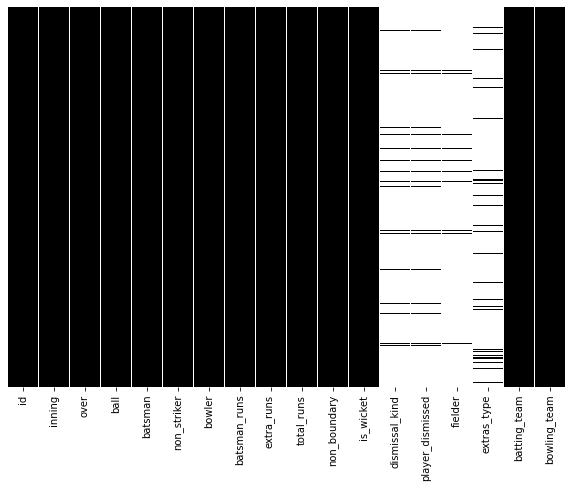

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(balls.isnull(),yticklabels=False, cbar=False, cmap='CMRmap')

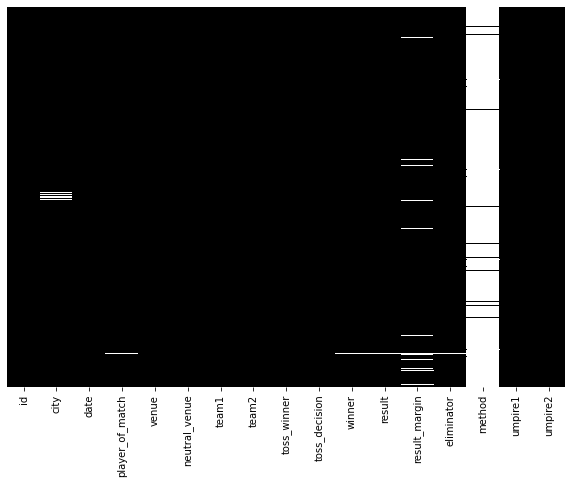

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(matches.isnull(),yticklabels=False, cbar=False, cmap='CMRmap')

In [10]:
# Frequency of unique values in each column
print(balls.nunique())
print('\n')
print(matches.nunique())

id                  816
inning                2
over                 20
ball                  9
batsman             537
non_striker         530
bowler              420
batsman_runs          7
extra_runs            7
total_runs            8
non_boundary          2
is_wicket             2
dismissal_kind        9
player_dismissed    506
fielder             879
extras_type           5
batting_team         15
bowling_team         15
dtype: int64


id                 816
city                32
date               596
player_of_match    233
venue               36
neutral_venue        2
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
result               3
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
dtype: int64


In [17]:
matches['season'] = pd.DatetimeIndex(matches['date']).year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [18]:
matches_per_season = matches.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
matches_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


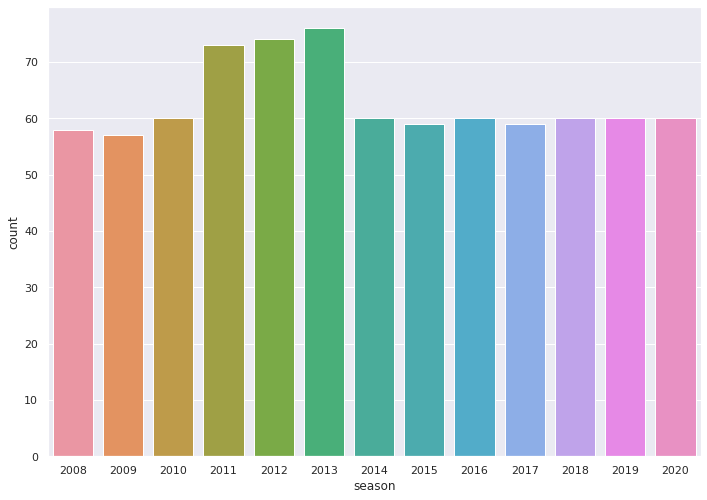

In [15]:
sns.countplot(matches['season'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

#NULL VALUES

Filling the null values of "matches" data

In [5]:
percentage = matches.isnull().sum() * 100 / len(matches)
missing_values = pd.DataFrame({'column_name': matches.columns,
                                 'percentage': percentage})

missing_values.sort_values('percentage', inplace=True)
missing_values 

,column_name,percentage
id,id,0.000000
toss_decision,toss_decision,0.000000
umpire1,umpire1,0.000000
team2,team2,0.000000
team1,team1,0.000000
toss_winner,toss_winner,0.000000
venue,venue,0.000000
date,date,0.000000
neutral_venue,neutral_venue,0.000000
umpire2,umpire2,0.000000


In [6]:
# Replacing categorical data with mode
matches['city'].fillna(matches['city'].mode()[0],inplace=True)
matches['player_of_match'].fillna(matches['player_of_match'].mode()[0],inplace=True)
matches['winner'].fillna(matches['winner'].mode()[0],inplace=True)
matches['result'].fillna(matches['result'].mode()[0],inplace=True)
matches['eliminator'].fillna(matches['eliminator'].mode()[0],inplace=True)

In [7]:
# Replacing numerical data with mean
mean_value=matches['result_margin'].mean()
matches['result_margin'].fillna(value=mean_value, inplace=True)

In [8]:
# Dropping the method column since 97% of the data is missing
matches.drop('method',axis=1, inplace=True)

In [9]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [10]:
percentage2 = balls.isnull().sum() * 100 / len(balls)
missing_values2 = pd.DataFrame({'column_name': balls.columns,
                                 'percentage2': percentage2})

missing_values2.sort_values('percentage2', inplace=True)
missing_values2

,column_name,percentage2
id,id,0.000000
is_wicket,is_wicket,0.000000
non_boundary,non_boundary,0.000000
total_runs,total_runs,0.000000
batting_team,batting_team,0.000000
batsman_runs,batsman_runs,0.000000
extra_runs,extra_runs,0.000000
non_striker,non_striker,0.000000
batsman,batsman,0.000000
ball,ball,0.000000


In [11]:
balls['bowling_team'].fillna(balls['bowling_team'].mode()[0],inplace=True)

In [12]:
# Dropping columns : extras_type, dismissal_kind, player_dismissed, fielder
balls.drop(['extras_type', 'player_dismissed', 'fielder'],axis=1, inplace=True)

In [13]:
balls['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

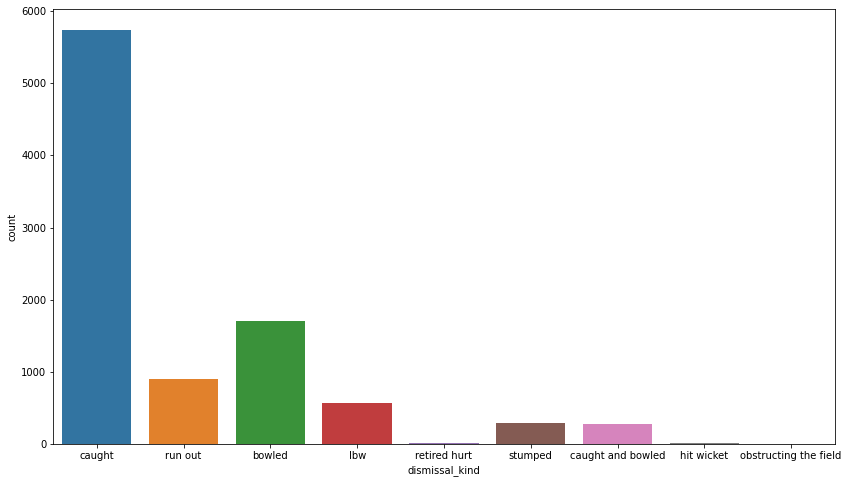

In [13]:
plt.figure(figsize=(14,8))
sns.countplot(x='dismissal_kind', data=balls)

In [14]:
balls['is_wicket'].value_counts()

0    183973
1      9495
Name: is_wicket, dtype: int64

In [15]:
def dismiss(col):
    if(pd.isnull(col)):
        return 'NOTOUT'
    else:
        return col
    
balls['dismissal_kind'] = balls['dismissal_kind'].apply(dismiss)
balls.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore


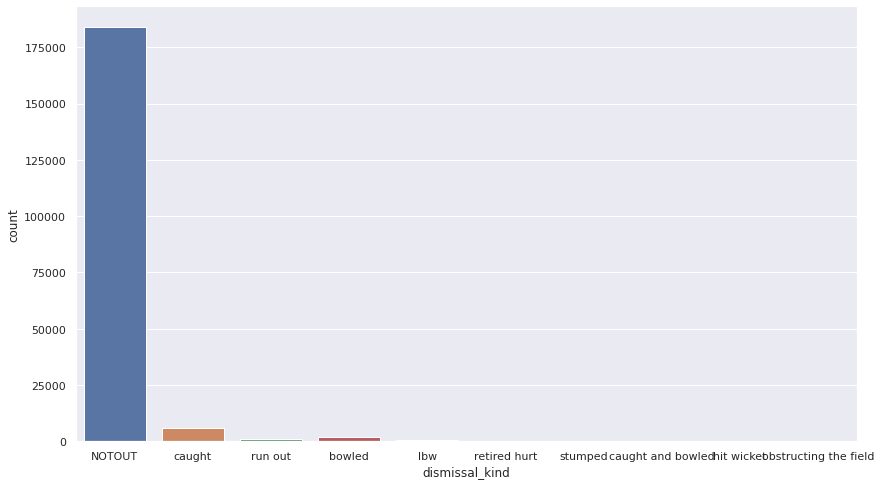

In [29]:
plt.figure(figsize=(14,8))
sns.countplot(x='dismissal_kind', data=balls)

In [16]:
balls.isnull().sum()

id                0
inning            0
over              0
ball              0
batsman           0
non_striker       0
bowler            0
batsman_runs      0
extra_runs        0
total_runs        0
non_boundary      0
is_wicket         0
dismissal_kind    0
batting_team      0
bowling_team      0
dtype: int64

#Groupby

In [34]:
top_bowlers = balls.groupby('is_wicket')['bowler'].value_counts()[0].head(10)
top_bowlers

bowler
Harbhajan Singh    3290
R Ashwin           3174
PP Chawla          3121
A Mishra           3064
SL Malinga         2786
SP Narine          2681
DJ Bravo           2671
B Kumar            2649
RA Jadeja          2637
P Kumar            2535
Name: bowler, dtype: int64

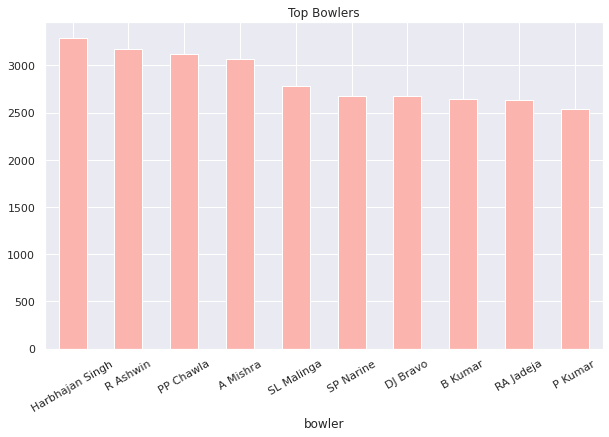

In [49]:
top_bowlers.plot(kind='bar', title = 'Top Bowlers', figsize = (10,6), cmap='Pastel1', rot = 30);

In [35]:
top_batsmen = balls.groupby('is_wicket')['batsman'].value_counts()[0].head(10)
top_batsmen

batsman
V Kohli       4446
S Dhawan      4056
RG Sharma     3911
SK Raina      3881
DA Warner     3693
RV Uthappa    3489
G Gambhir     3389
MS Dhoni      3367
CH Gayle      3226
AM Rahane     3200
Name: batsman, dtype: int64

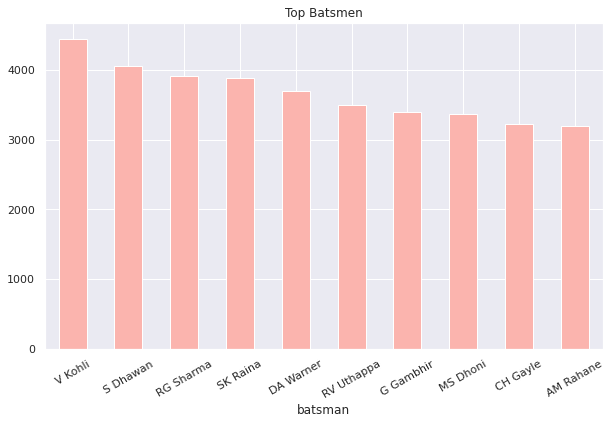

In [43]:
top_batsmen.plot(kind='bar', title = 'Top Batsmen', figsize = (10,6), cmap='Pastel1', rot = 30);

In [51]:
batsmen = balls.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [52]:
top_batsmen_by_runs = batsmen.sort_values(by='runs', ascending=False)[:10]
top_batsmen_by_runs

,batsman,runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


In [ ]:
innings = balls.groupby(['batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='inning_runs')

In [ ]:
best_innings = innings.sort_values(by='inning_runs', ascending=False)[:10]
best_innings

,batsman,inning_runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


In [ ]:
bowlers = balls[balls['dismissal_kind'] != 'run out']
bowlers = balls.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers 

index  wickets
bowler                             
A Ashish Reddy 0     66652   bowled
               1     66657   caught
               2     67823   caught
               3     68326   caught
               4     69158   caught
...                    ...      ...
Z Khan         114  140648   caught
               115  148376   bowled
               116  148429   caught
               117  149278  run out
               118  149401   caught

[9495 rows x 2 columns]

#Merging Data

In [19]:
data = pd.merge(left=matches, right=balls, on='id', how='right')

In [20]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NOTOUT,Kolkata Knight Riders,Royal Challengers Bangalore


In [22]:
data.shape

(193468, 31)

In [25]:
match_winners = data.winner.value_counts()
match_winners

Mumbai Indians                 29257
Chennai Super Kings            25531
Kolkata Knight Riders          23358
Royal Challengers Bangalore    21240
Kings XI Punjab                20904
Rajasthan Royals               19370
Delhi Daredevils               15709
Sunrisers Hyderabad            15667
Deccan Chargers                 7013
Delhi Capitals                  4663
Gujarat Lions                   3063
Pune Warriors                   2883
Rising Pune Supergiant          2383
Kochi Tuskers Kerala            1322
Rising Pune Supergiants         1105
Name: winner, dtype: int64

#Univariate Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


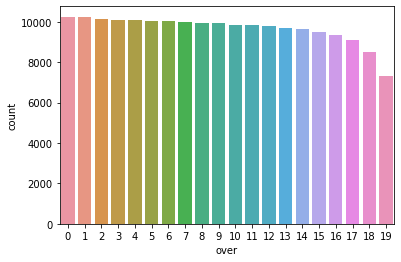

In [45]:
sns.countplot(balls['over'])

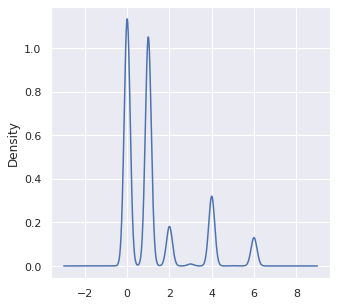

In [51]:
plt.figure(figsize=(5,5))
balls['batsman_runs'].plot(kind='density')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


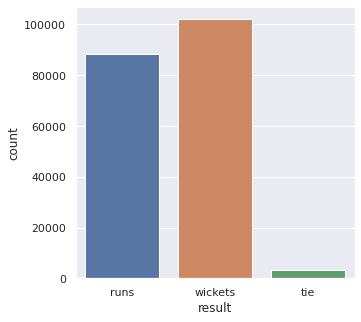

In [61]:
sns.countplot(data['result'])

In [57]:
won_batting_first=matches[matches['result_margin']!=0]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.000000,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.000000,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.000000,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.000000,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.000000,N,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,17.321652,Y,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.000000,N,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.000000,N,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.000000,N,PR Reiffel,S Ravi,2020


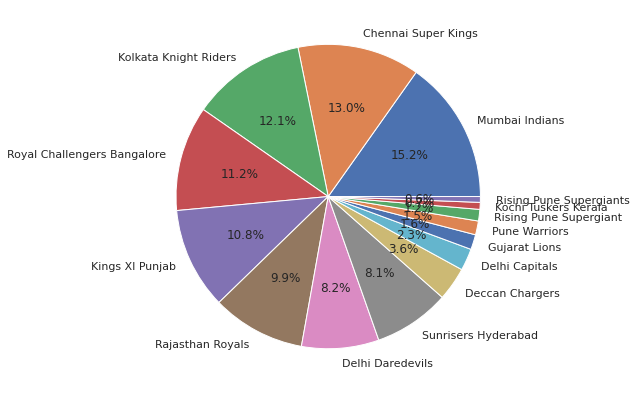

In [58]:
plt.figure(figsize=(7,7))
plt.pie(list(won_batting_first['winner'].value_counts()),labels=list(won_batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

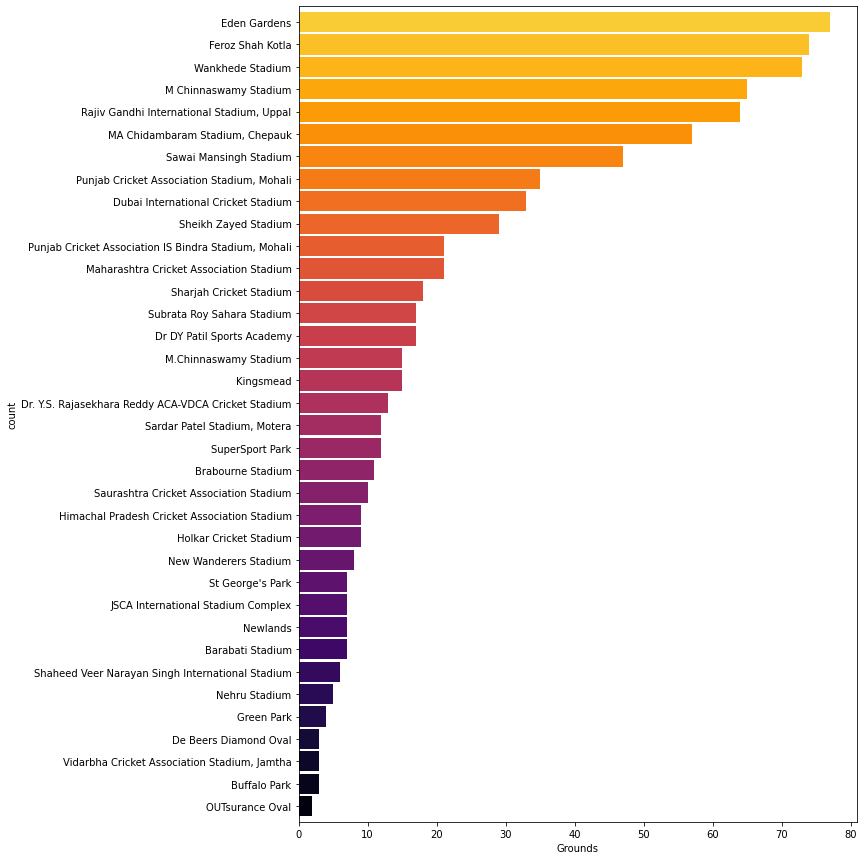

In [ ]:
plt.subplots(figsize=(10,15))
ax=matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()


10 Mosts Played Venue in the History of IPL from 2008 to 2020

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


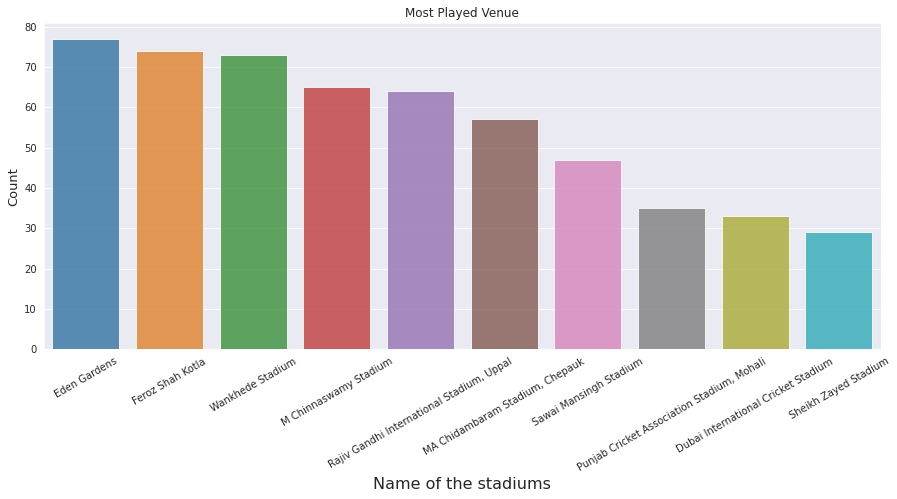

In [ ]:
sns.set_style("darkgrid")
ls=matches['venue'].value_counts().sort_values(ascending=False)
ls=ls[:10]
plt.figure(figsize=(15,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played Venue')
plt.ylabel('Count', fontsize=13)
plt.xlabel('Name of the stadiums', fontsize=16)
Most_Played.set_xticklabels(rotation=30, labels=ls.index, fontsize=10)
plt.show()

Top players of the matches

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


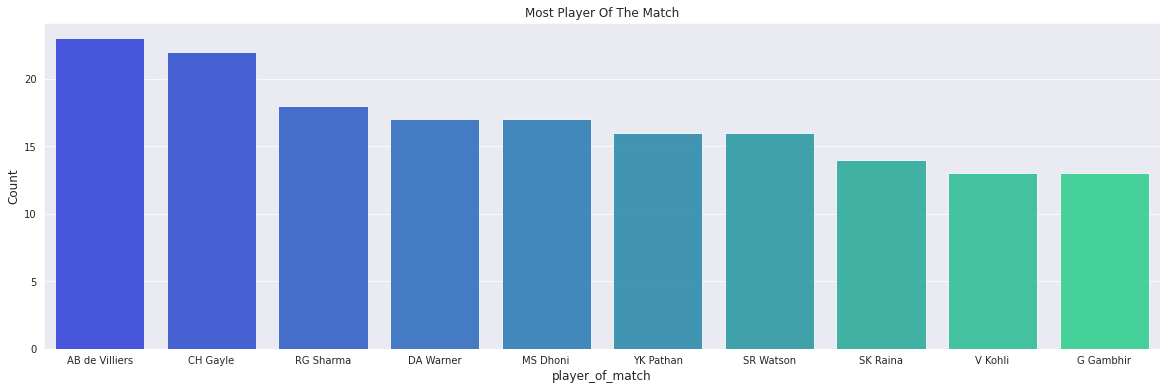

In [ ]:
players = matches['player_of_match'].value_counts()
players = players[:10]

sns.set_style("darkgrid")
plt.figure(figsize=(20,6))

players=sns.barplot(players.index, players.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)

plt.show()

#Bivariate Plots


Box plots of top 5 teams' score

In [28]:
team_score = balls.groupby(['id', 'batting_team']).total_runs.sum().reset_index()

top_teams = balls.groupby('batting_team').total_runs.sum().nlargest(5).reset_index().batting_team.tolist()
top_teams_df = team_score[team_score.batting_team.isin(top_teams)]

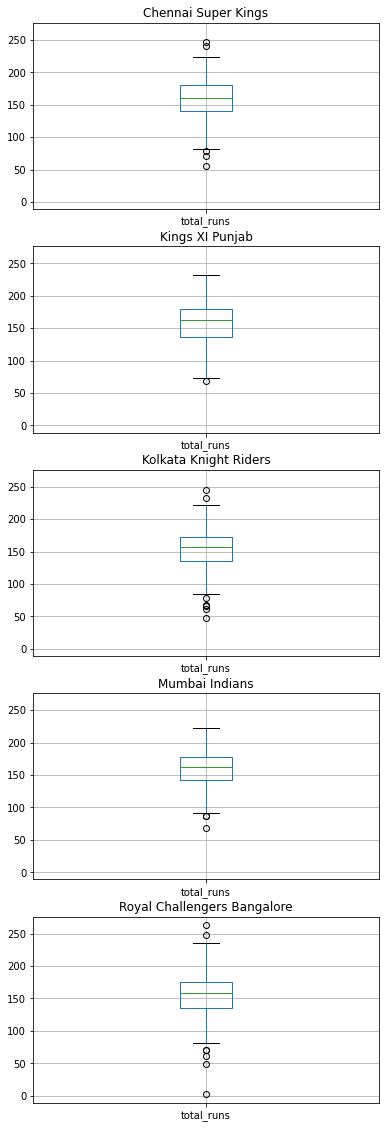

In [29]:
top_teams_df.groupby('batting_team').boxplot(column = 'total_runs', layout=(5,1),figsize=(6,20));

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


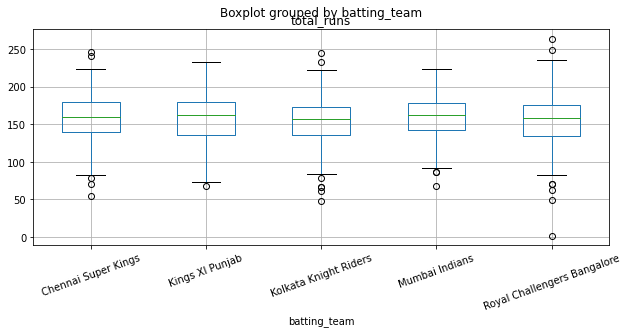

In [30]:
top_teams_df.boxplot( column = 'total_runs',by = 'batting_team', rot = 20, figsize = (10,4));

Scatter plot to represent win, by runs 

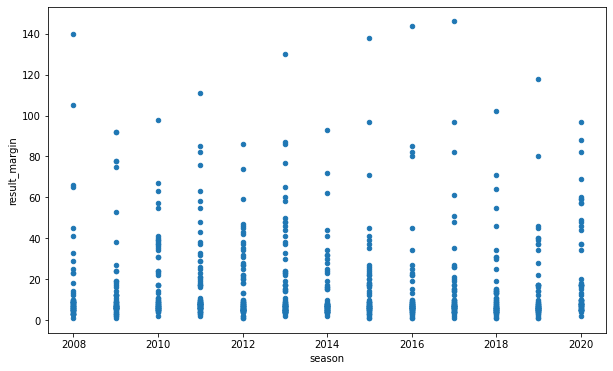

In [32]:
matches.plot(kind='scatter', x = 'season', y = 'result_margin', figsize=(10,6))

# Multivariate Plot

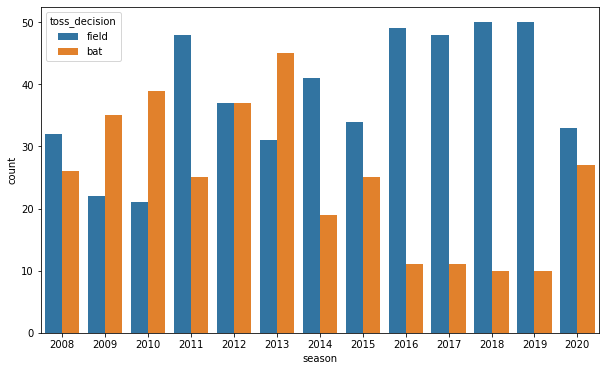

In [24]:
# Toss Decisions across Seasons
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

In [37]:
pip install python-pptx

     |████████████████████████████████| 8.9MB 8.4MB/s 
     |████████████████████████████████| 153kB 46.9MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.18-cp37-none-any.whl size=275704 sha256=e044f1b4fe598b13b68df8148095c1587d0bb975c6d015acb9afad26cb0c1614
  Stored in directory: /root/.cache/pip/wheels/1f/1f/2c/29acca422b420a0b5210bd2cd7e9669804520d602d2462f20b
Successfully built python-pptx


In [38]:
from pptx import Presentation 

In [39]:
# Creating presentation object
root = Presentation()

In [40]:
# Creating slide layout
first_slide_layout = root.slide_layouts[0]

In [41]:
slide = root.slides.add_slide(first_slide_layout)

In [42]:
slide.shapes.title.text = " Created By python-pptx"

In [43]:
root.save("Output.pptx")